In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def deltaG_over_G0(V, G0):
        if V>0:
            # Set Parameters
            beta1, beta2, beta3, alpha, gamma1, gamma2, gamma3 = -0.1832, 0.3524, 24.32, 1, 3.108e-08, -7.563e-9, 4.594e-10
        else:
            # Reset Parameters
            beta1, beta2, beta3, alpha, gamma1, gamma2, gamma3 = -0.1832, 0.1239, 4.433, 1, -0.006067,  0.003209, -0.0001962
        # Calculate the common denominator term (1 + beta2 * (alpha * V)^2)
        denom = 1 + beta2 * (alpha * V)**2
        
        # Calculate the exponential term: exp(beta1 / denom)
        exp_term = np.exp(beta1 / denom)
        
        # Calculate the sinh term: sinh(beta3 * alpha * V / denom)
        sinh_term = np.sinh(beta3 * alpha * V / denom)
        
        # Calculate the gamma term: (gamma1 + gamma2 * sqrt(G0) + gamma3 * G0)
        gamma_term = gamma1 + gamma2 * np.sqrt(G0) + gamma3 * G0
        
        # Combine all terms to calculate deltaG / G0
        deltaG_over_G0 = exp_term * sinh_term * gamma_term
        
        return deltaG_over_G0

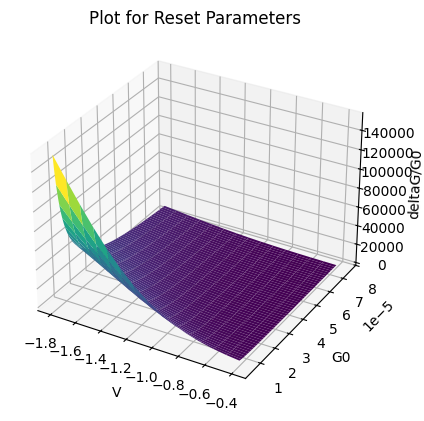

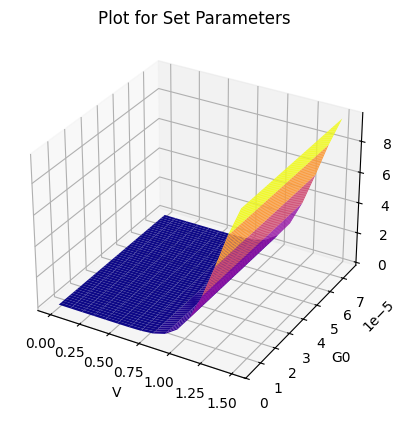

In [17]:
# Reset parameters
x = np.arange(-0.4, -1.9, -0.1)
y = np.arange(75, 5, -0.1)/1e6
z = np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        z[i, j] = deltaG_over_G0(x[i], y[j])
X, Y = np.meshgrid(x, y)
Z = z.T

# Plotting the first set of results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('V')
ax.set_ylabel('G0')
ax.set_zlabel('deltaG/G0')
ax.set_title('Plot for Reset Parameters')
plt.show()

# SET parameters
x1 = np.arange(0, 1.6, 0.1)
y1 = np.arange(5, 75, 0.1)/1e6
z1 = np.zeros((len(x1), len(y1)))

for i in range(len(x1)):
    for j in range(len(y1)):
        z1[i, j] = deltaG_over_G0(x1[i], y1[j])

# Create meshgrid for X1 and Y1
X1, Y1 = np.meshgrid(x1, y1)

# Transpose Z1 to match the shape of X1, Y1
Z1 = z1.T

# Plotting the second set of results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, Y1, Z1, cmap='plasma')
ax.set_xlabel('V')
ax.set_ylabel('G0')
ax.set_zlabel('deltaG/G0')
ax.set_title('Plot for Set Parameters')
plt.show()


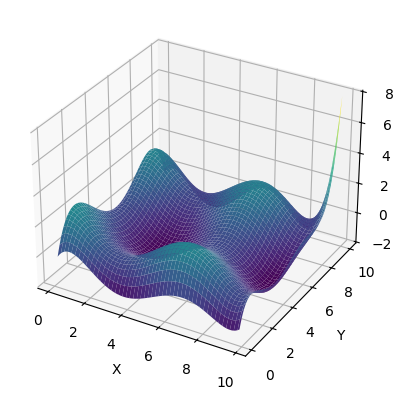

In [4]:
import numpy as np
from scipy.interpolate import SmoothBivariateSpline
import matplotlib.pyplot as plt

# Example 3D points (x, y, z)
# Replace this with your actual 3D data points
x = np.random.rand(100) * 10  # X-coordinates
y = np.random.rand(100) * 10  # Y-coordinates
z = np.sin(x) + np.cos(y)     # Z-values (for demonstration, could be any function)

# Create cubic spline interpolator for the surface
spline = SmoothBivariateSpline(x, y, z, kx=5, ky=5)

# Generate a grid to evaluate the spline
x_grid = np.linspace(min(x), max(x), 100)
y_grid = np.linspace(min(y), max(y), 100)
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)

# Evaluate the spline over the grid
z_mesh = spline(x_grid, y_grid)

# Plot the result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


In [5]:
spline(0.4, 0.5), np.sin(0.4), np.cos(0.5), np.sin(0.4) + np.cos(0.5)

(array([[1.01357192]]),
 0.3894183423086505,
 0.8775825618903728,
 1.2670009041990233)

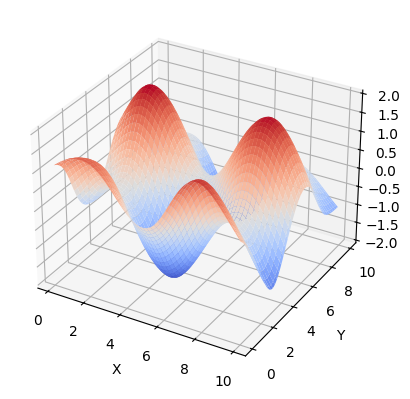

In [7]:
from scipy.interpolate import Rbf
import numpy as np
import matplotlib.pyplot as plt

# Example 3D points (x, y, z)
x = np.random.rand(100) * 10  # X-coordinates
y = np.random.rand(100) * 10  # Y-coordinates
z = np.sin(x) + np.cos(y)     # Z-values (replace with your actual data)

# Apply Radial Basis Function (RBF) interpolation
rbf = Rbf(x, y, z, function='multiquadric')  # You can try other functions like 'gaussian', 'linear', etc.

# Generate a grid for the surface
x_grid = np.linspace(min(x), max(x), 100)
y_grid = np.linspace(min(y), max(y), 100)
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)

# Interpolate z values over the grid
z_pred = rbf(x_mesh, y_mesh)

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_mesh, y_mesh, z_pred, cmap='coolwarm')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


In [8]:
rbf(np.pi/2, 0)

array(1.49281852)